<a href="https://colab.research.google.com/github/Aditya-Prakash04/Neural-Blend-Task/blob/main/BCS%20TASK%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Brain and Cognitive Society, IIT Kanpur**
## **Introduction to Deep Learning Workshop**
**This python notebook is an assingment on ML/DL**

In this assingment you will solve a **regression** problem of predicting House prices using basic python libraries, and build a **neural network** for handwritten digit identification using **TensorFlow**

## **Linear Regression**
We will use Linear regression for predicting house prices

We are using a Kaggle dataset- https://www.kaggle.com/harlfoxem/housesalesprediction

In [ ]:
# Lets import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math


### **Dataset Preparation**

In [ ]:
# Execute this cell for loading dataset in a pandas dataframe

from IPython.display import clear_output
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct' -O Linear_regression_dataset

data_df = pd.read_csv("Linear_regression_dataset")


--2023-06-04 08:09:38--  https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct
Resolving docs.google.com (docs.google.com)... 172.217.212.138, 172.217.212.139, 172.217.212.102, ...
Connecting to docs.google.com (docs.google.com)|172.217.212.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-3o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i80dq5n75msoljpu5kg7obrd2004rn69/1685866125000/17346214133729595847/*/16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct?e=download&uuid=ba425caf-dac7-48da-ac64-43f3d39b4988 [following]
--2023-06-04 08:09:39--  https://doc-14-3o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i80dq5n75msoljpu5kg7obrd2004rn69/1685866125000/17346214133729595847/*/16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct?e=download&uuid=ba425caf-dac7-48da-ac64-43f3d39b4988
Resolving doc-14-3o-docs.googleusercontent.com (doc-14-3o-docs.googleusercontent.com)... 142.250.128.132, 2607:

In [ ]:
# Lets have a quick Look at dataset

print("(No of rows, No of Columns) = ",data_df.shape)
data_df.head()

(No of rows, No of Columns) =  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


So there are **19** features (of course we will not use id as feature :) ), and 1 variable to predict(price)

But note that the **date** column contain strings so first we will remove T00.. part from it and than convert it to numpy array.

In [ ]:
data_df['date'] = data_df['date'].str.replace('T000000','')                                      # Remove T000000 part from data column. Hint: search about .str.replace() method. :)  

data_array = data_df.loc[:, data_df.columns != 'id']                                                       # Create a numpy array which does not have "id" field
assert (data_array.shape == (21613,20))

data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Now the next task is **normalization**.

We will scale each column of dataset by x -> (x-u)/s

where u is mean(x), and s is standard deviation of u

In [ ]:
mean = data_array.mean(axis=0)                               # this should be an array, each entry should be mean of a column
sd = data_array.std(axis=0)                                  # this should be an array, each entry should be standard deviation of a column


data_array_norm = (data_array.astype(float) - mean)/sd


print(data_array_norm.shape)



(21613, 20)


<ipython-input-110-1e9fd0fe659d>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sd = data_array.std(axis=0)                                  # this should be an array, each entry should be standard deviation of a column


The last step is to make train and test dataset and to create seperate vector for price

In [ ]:
labels = data_df['price']                                                                                               # extract the price column from data

x_array_norm =data_array_norm.drop("price",axis=1,inplace=False)                                                        # delete the price column from data_array_norm. Hint: use np.delete()

x_train, x_test, y_train, y_test = train_test_split(x_array_norm,labels,test_size=0.15,random_state=42,shuffle=True)    # splitting data into test and train set.

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)



(18371, 19) (3242, 19) (18371,) (3242,)


### **Loss and gradient descent**
We will use mean squared error(MSE) as loss

Use the gradient descent algorithm which you learned from tutorials

Your task is to complete the following functions

In [ ]:
def loss(y_pred,y_true):
  """

  input:
  y_pred = [array] predicted value of y
  y_true = [array] ground truth
  
  output:
  mse: [scalar] the MES loss
  """
  mse = (np.square(y_pred - y_true)).mean()             # fill code here

  return mse

In [ ]:
def y(x,a,b):
  """
  This function should return predicted value of y = ax+b
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias
  
  output:
  y_pred: [array] predicted value of y of shape (m,)
  """

  m,n = x.shape
  y_pred = (np.dot(x,a) + b)            # fill code here
  y_pred = 1/(1 + np.exp(-y_pred))  

  assert(y_pred.shape == (m,))
  return y_pred

In [ ]:
def gradient(x,a,b,y_true):
  """
  This function shoud return gradient of loss
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias
  y_true: [array] ground truth of shape (m,)

  output:
  grad: [tuple] a tuple (derivative with respect to a[array of shape(n,)], derivative with respect to b[scalar])
  """
  m,n = x.shape
  yp = y(x,a,b)
  k =len(x)
  
  

  da =  (1/k)*(np.dot(np.transpose(x),(yp-y_true)))  # write code to calculate derivative of loss with respect to a
  db =   np.mean(yp-y_true)                            # write code to calculate derivative of loss with respect to b

  assert(da.shape ==(n,))
  return (da,db)

In [ ]:
def gradient_descent(x,y_true,learning_rate=0.01,epochs = 10):
  """
  This function perfroms gradient descent and minimizes loss
  input:
  x: [array] the feature vector of shape (m,n)
  y_true: [array] ground truth of shape (m,)
  
  output:
  loss: [array] of size (epochs,)
  weights: [tuple] (a,b)
  """
  m,n = x.shape
  loss_mse = []                                 # initialize empty list to store loss
  a = np.zeros(n)                                 # initialize a- weights and b- bias
  b = 0

  for i in range(epochs):
    # calculate derivative using gradient() function
    # apply gradient descent now to update a and b
    dw,db = gradient(x,a,b,y_true)
    a = a -learning_rate*dw
    b = b -learning_rate*db
    
    loss_val =   loss(a,b)                             # calculate loss at this point
    loss_mse.append(loss_val)

    print("Epoch ",i+1," Completed!","loss = ",loss_val)
  
  print("Training completed!!")

  assert(a.shape==(n,))

  return (loss_mse,a,b)

### **Training** 

In [ ]:
epochs = 10             # tweak this!!!
learn_rate = 0.001          # choose learning rate wisely otherwise loss may diverge!!

train_loss,a,b = gradient_descent(x_train,y_train,learning_rate=0.01,epochs=10)

Epoch  1  Completed! loss =  nan
Epoch  2  Completed! loss =  nan
Epoch  3  Completed! loss =  nan
Epoch  4  Completed! loss =  nan
Epoch  5  Completed! loss =  nan
Epoch  6  Completed! loss =  nan
Epoch  7  Completed! loss =  nan
Epoch  8  Completed! loss =  nan
Epoch  9  Completed! loss =  nan
Epoch  10  Completed! loss =  nan
Training completed!!


### **Evaluation and Visualization**
Lets plot how loss varies with epochs


In [ ]:
test_loss = loss()

print("Loss on test data = ",test_loss)

# Visualization of loss

plt.plot(loss,epochs)                   # plot loss versus epochs
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

TypeError: ignored

## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [2]:
# Lets import the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [3]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

11490434/11490434 [==============================] - 0s 0us/step
No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 3       7       6       7       6       3       

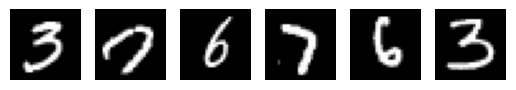

In [4]:
# Run this cell to visualize some of the images from dataset

n = 6   # = no. of images to visualize

index = np.random.choice(x_train.shape[0],6)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [5]:
# Flatten the images into 1-d vectors

x_train_flatten = x_train.flatten()                                   # flatten the images of training set 
x_test_flatten =  x_test.flatten()                                        # flatten the images of test set


# Divide the training data into training and validation data....

n_validation = 10000                                        # choose number of images to be used for validation

x_validation = x_train[:n_validation]
y_validation = x_test[:n_validation]

x_train = x_train[n_validation:]
y_train = y_train[n_validation:]





### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [6]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Make a graphical representation of the model...

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [7]:
model.compile(optimizer="adam",loss ="sparse_categorical_crossentropy",metrics=["accuracy"])

n_epochs = 10               # set number of epochs
batch_size = 512            # you can tweak with these parametrs
x_train_reshaped = x_train.reshape(-1, 28, 28, 1)
#x_validation_reshaped = x_validation.reshape(-1, 28, 28, 1)
history = model.fit(x_train_reshaped,y_train,epochs=n_epochs,batch_size = 512,validation_data=(x_test,y_test))

Epoch 1/10
98/98 [==============================] - 50s 497ms/step - loss: 2.1528 - accuracy: 0.7746 - val_loss: 0.2011 - val_accuracy: 0.9454
Epoch 2/10
98/98 [==============================] - 45s 463ms/step - loss: 0.1512 - accuracy: 0.9564 - val_loss: 0.1195 - val_accuracy: 0.9660
Epoch 3/10
98/98 [==============================] - 49s 497ms/step - loss: 0.0932 - accuracy: 0.9724 - val_loss: 0.0893 - val_accuracy: 0.9757
Epoch 4/10
98/98 [==============================] - 45s 458ms/step - loss: 0.0672 - accuracy: 0.9796 - val_loss: 0.0722 - val_accuracy: 0.9803
Epoch 5/10
98/98 [==============================] - 46s 469ms/step - loss: 0.0508 - accuracy: 0.9845 - val_loss: 0.0698 - val_accuracy: 0.9811
Epoch 6/10
98/98 [==============================] - 45s 464ms/step - loss: 0.0395 - accuracy: 0.9875 - val_loss: 0.0679 - val_accuracy: 0.9810
Epoch 7/10
98/98 [==============================] - 47s 480ms/step - loss: 0.0324 - accuracy: 0.9895 - val_loss: 0.0631 - val_accuracy: 0.9832

### **Evaluate**
Evaluate your model on test data.

And Show some results

313/313 [==============================] - 3s 9ms/step - loss: 0.0672 - accuracy: 0.9844
Loss =  0.06715337187051773
Accuracy =  98.43999743461609 %


TypeError: ignored

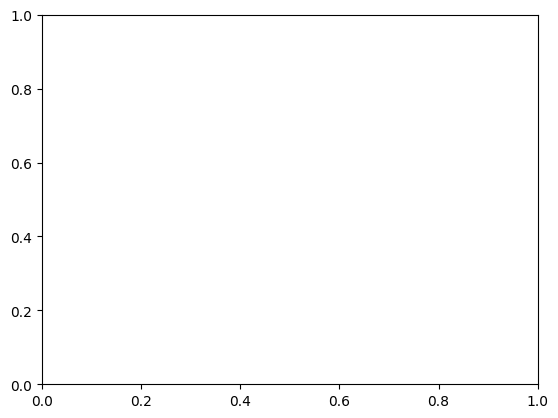

In [8]:
results = model.evaluate(x_test,y_test)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
plt.plot(history, label="Training accuracy")
plt.plot(history, label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
plt.plot(history, label="Training Loss")
plt.plot(history, label="validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Lets show our results on images from testing dataset

In [9]:
n = 5 # = no. of images to see predictions on

index = np.random.choice(x_test,y_test)  # choose random index from test data
print("label: ")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_test,y_test)             # fill code to show images from test set
    plt.axis("off")
    print(y_test[ind],end="       ")

plt.show()
print("Predicted value: ")

# Now lets print the predictions

for i,ind in enumerate(index):
    # write code to predict and print digit in image
    # Hint: the output of the model is a 10-d vector which gives probabilties
    # The digit in the image would be the class for which probability is hghest...

    digit = ...
    print(digit,end="      ")

ValueError: ignored

That's it you have completed the assignment !!

We hope that you learned something from this exercise

### Credits:

**Leaders:**

Mohit Kulkarni

Shivanshu Tyagi

**Scretaries:**

Sahil Bansal

Shashwat Gupta

Rashmi Sharma